# Hive Metrics

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import mode
import pandas as pd
import seaborn as sns
from io import StringIO
import requests
import json
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture
%matplotlib inline

Getting Poughkeepsie, NY local hive metrics from 
https://map.beecounted.org/citizen_science/embedded_map
using curl for each hive

In [2]:
#!mkdir -p data

In [3]:
# Get weight data
#!curl 'https://map.beecounted.org/api_internal/hive_summary_weight_graph/p2qf/1304612040/1620231240/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/p2qf/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_weight_graph-p2qf.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_weight_graph/OAco/1304619496/1620238696/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/OAco/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_weight_graph-OAco.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_weight_graph/58ho/1304619714/1620238914/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/58ho/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_weight_graph-58ho.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_weight_graph/zvaP/1304619917/1620239117/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/zvaP/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_weight_graph-zvaP.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_weight_graph/1cdn/1304619909/1620239109/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/1cdn/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_weight_graph-1cdn.html

In [4]:
# Get temp data
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/p2qf/1304612040/1620231240/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/p2qf/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-p2qf.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/sPxZ/1304619093/1620238293/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/sPxZ/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-sPxZ.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/oJfp/1304619285/1620238485/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/oJfp/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-oJfp.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/OAco/1304619496/1620238696/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/OAco/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-OAco.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/FoYq/1304619591/1620238791/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/FoYq/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-FoYq.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/58ho/1304619714/1620238914/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/58ho/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-58ho.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/zvaP/1304619917/1620239117/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/zvaP/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-zvaP.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/1cdn/1304619909/1620239109/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/1cdn/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-1cdn.html

In [5]:
# Get humidity data
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/p2qf/1304612040/1620231240/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/p2qf/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-p2qf.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/sPxZ/1304619093/1620238293/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/sPxZ/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-sPxZ.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/oJfp/1304619285/1620238485/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/oJfp/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-oJfp.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/FoYq/1304619591/1620238791/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/FoYq/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-FoYq.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/58ho/1304619714/1620238914/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/58ho/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-58ho.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/zvaP/1304619917/1620239117/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/zvaP/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-zvaP.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/1cdn/1304619909/1620239109/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/1cdn/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-1cdn.html

In [6]:
import sys
#!{sys.executable} -m pip install ?

In [7]:
# Imports all the stuffs
import datetime
import json
#import matplotlib as plt
import os
import pandas as pd
from pprint import pprint
import re

In [8]:
def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +datetime.timedelta(hours=t.minute//30))

In [9]:
directory = r'data'
hive_dfs = {}

for filename in os.listdir(directory):
    if filename[:4] == "hive":
        fullname = os.path.join(directory, filename)
        hive_id = filename.split("-")[1].replace(".html","")
        metric = filename.replace("hive_summary_","").replace(f"_graph-{hive_id}.html","")
        print(fullname,hive_id, metric)
        if hive_id not in hive_dfs:
            hive_dfs[hive_id] = {}
        with open(fullname, "r") as f:
            content = f.read()
        m = re.search(r"\s*data: (\[.*?,\]),", content)
        if m is not None:
            result = json.loads(m.group(1).replace("],]","]]"))
            result = [[hour_rounder(datetime.datetime.utcfromtimestamp(float(r[0])/1000.)), r[1]]for r in result]
            df = pd.DataFrame(result, columns=['dt',metric])
            df = df.set_index('dt')
            hive_dfs[hive_id][metric] = df

data\hive_summary_humidity_graph-1cdn.html 1cdn humidity
data\hive_summary_humidity_graph-58ho.html 58ho humidity
data\hive_summary_humidity_graph-FoYq.html FoYq humidity
data\hive_summary_humidity_graph-oJfp.html oJfp humidity
data\hive_summary_humidity_graph-p2qf.html p2qf humidity
data\hive_summary_humidity_graph-sPxZ.html sPxZ humidity
data\hive_summary_humidity_graph-zvaP.html zvaP humidity
data\hive_summary_temperature_graph-1cdn.html 1cdn temperature
data\hive_summary_temperature_graph-58ho.html 58ho temperature
data\hive_summary_temperature_graph-FoYq.html FoYq temperature
data\hive_summary_temperature_graph-OAco.html OAco temperature
data\hive_summary_temperature_graph-oJfp.html oJfp temperature
data\hive_summary_temperature_graph-p2qf.html p2qf temperature
data\hive_summary_temperature_graph-sPxZ.html sPxZ temperature
data\hive_summary_temperature_graph-zvaP.html zvaP temperature
data\hive_summary_weight_graph-58ho.html 58ho weight
data\hive_summary_weight_graph-OAco.html OAc

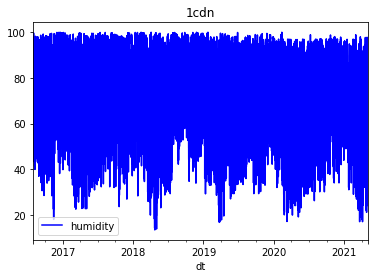

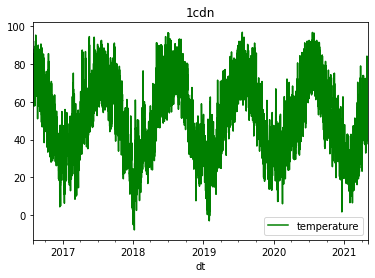

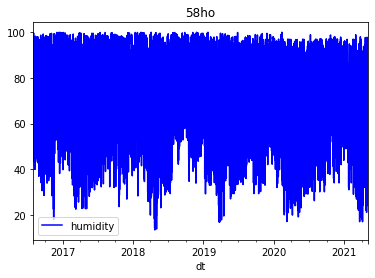

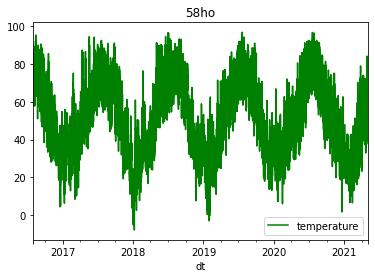

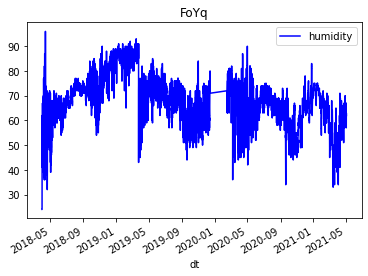

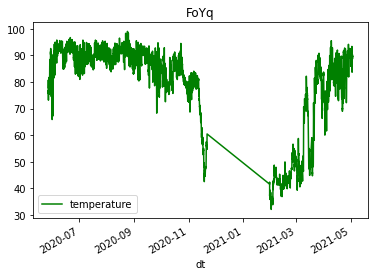

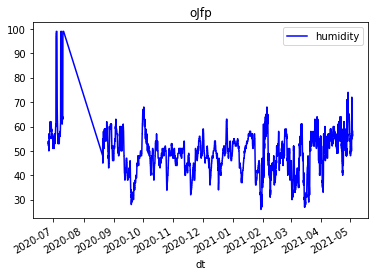

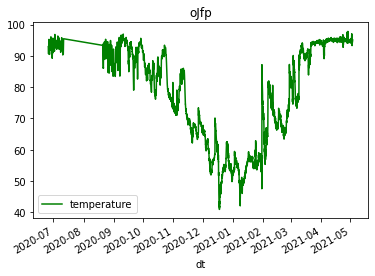

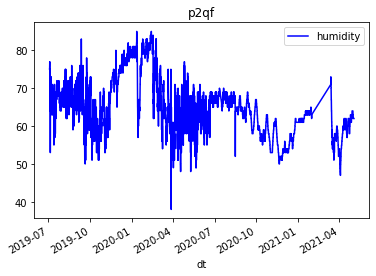

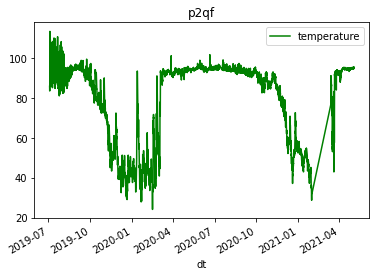

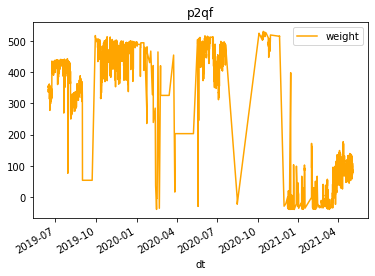

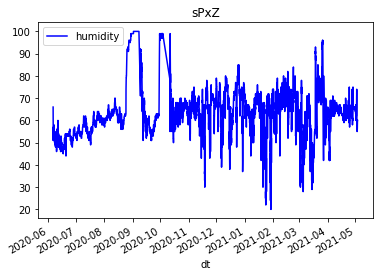

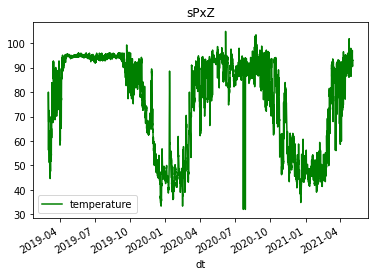

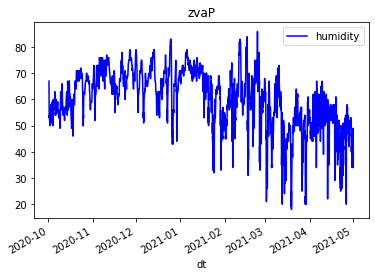

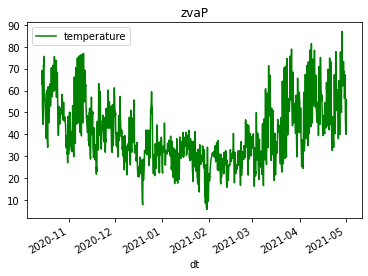

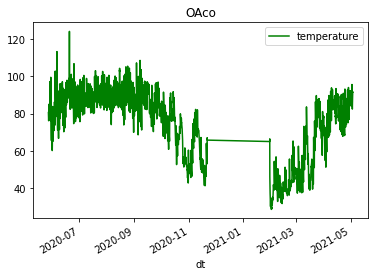

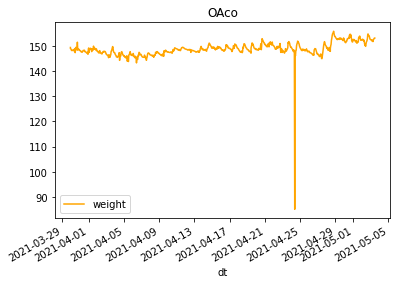

In [10]:
for hive in hive_dfs:
    for k in hive_dfs[hive].keys():
        if k == "temperature":
            color = "green"
        elif k == "humidity":
            color = "blue"
        elif k == "weight":
            color = "orange"
        hive_dfs[hive][k].plot(title=hive, color=color);

In [11]:
#Merge dfs for each hive
for hive in hive_dfs:
    keys = list(hive_dfs[hive].keys())
    #print(keys[0])
    if len(hive_dfs[hive].keys()) == 3:
        tmpdf1 = hive_dfs[hive][keys[0]].merge(hive_dfs[hive][keys[1]], how='left', on='dt')
        hive_dfs[hive] = tmpdf1.merge(hive_dfs[hive][keys[2]], how='left', on='dt')
        print(hive)
        print(hive_dfs[hive].head(20), "/n")
        
        #Drop nulls
        hive_dfs[hive].dropna(inplace = True)
    elif len(hive_dfs[hive].keys()) == 2:
        hive_dfs[hive] = hive_dfs[hive][keys[0]].merge(hive_dfs[hive][keys[1]], how='left', on='dt')
        print(hive)
        print(hive_dfs[hive].head(20), "\n")
        
        #Drop nulls
        hive_dfs[hive].dropna(inplace = True)

1cdn
                     humidity  temperature
dt                                        
2016-07-30 18:00:00      93.5         72.0
2016-07-30 19:00:00      93.3         70.7
2016-07-30 20:00:00      95.1         69.8
2016-07-30 21:00:00      96.1         70.1
2016-07-30 22:00:00      96.8         69.3
2016-07-30 23:00:00      97.4         68.6
2016-07-31 00:00:00      98.5         68.4
2016-07-31 01:00:00      97.6         68.3
2016-07-31 02:00:00      97.9         68.2
2016-07-31 03:00:00      95.4         68.4
2016-07-31 04:00:00      96.8         67.9
2016-07-31 05:00:00      97.0         67.4
2016-07-31 06:00:00      98.3         67.1
2016-07-31 07:00:00      97.4         67.5
2016-07-31 08:00:00      96.8         68.8
2016-07-31 09:00:00      94.9         69.7
2016-07-31 10:00:00      96.5         71.2
2016-07-31 11:00:00      94.4         72.1
2016-07-31 12:00:00      95.3         71.5
2016-07-31 13:00:00      97.0         71.5 

58ho
                     humidity  temperature

In [12]:
for hive in hive_dfs:
    #Check for and remove outliers in each column, as well as in the same index in the ss_hive_dfs dataframes
    for col in hive_dfs[hive].keys():
        print(hive)
        print(col)
        if col == "humidity":
            #Just checking for humidity values <0 or >100
            print(hive_dfs[hive].loc[(hive_dfs[hive][col]<0) | (hive_dfs[hive][col]> 100)], "\n")
            hive_dfs[hive].drop(hive_dfs[hive].loc[(hive_dfs[hive][col]<0) | (hive_dfs[hive][col]> 100)].index, inplace = True)
        elif col == "temperature":
            #Just making sure temp is in a good range, lets say >-10 and <110, since in the Hudson Valley, NY area it
            #should be in that range most of the time
            print(hive_dfs[hive].loc[(hive_dfs[hive][col]<-10) | (hive_dfs[hive][col]> 110)], "\n")
            hive_dfs[hive].drop(hive_dfs[hive].loc[(hive_dfs[hive][col]<-10) | (hive_dfs[hive][col]> 110)].index, inplace = True)
        else:
            q1 = hive_dfs[hive][col].quantile(0.25)
            q3 = hive_dfs[hive][col].quantile(0.75)
            iqr = q3 - q1
            print(q1)
            print(q3)
            print(iqr)

            print(hive_dfs[hive].loc[(hive_dfs[hive][col]<= (q1 - (2 * iqr))) | (hive_dfs[hive][col]>= (q3 + (2 * iqr)))], "\n")
            hive_dfs[hive].drop(hive_dfs[hive].loc[(hive_dfs[hive][col]<= (q1 - (2 * iqr))) | (hive_dfs[hive][col]>= (q3 + (2 * iqr)))].index, inplace = True)
            
        #resetting the index of the df
        hive_dfs[hive].reset_index(drop = True, inplace=True)


1cdn
humidity
Empty DataFrame
Columns: [humidity, temperature]
Index: [] 

1cdn
temperature
Empty DataFrame
Columns: [humidity, temperature]
Index: [] 

58ho
humidity
Empty DataFrame
Columns: [humidity, temperature]
Index: [] 

58ho
temperature
Empty DataFrame
Columns: [humidity, temperature]
Index: [] 

FoYq
humidity
Empty DataFrame
Columns: [humidity, temperature]
Index: [] 

FoYq
temperature
Empty DataFrame
Columns: [humidity, temperature]
Index: [] 

oJfp
humidity
Empty DataFrame
Columns: [humidity, temperature]
Index: [] 

oJfp
temperature
Empty DataFrame
Columns: [humidity, temperature]
Index: [] 

p2qf
humidity
Empty DataFrame
Columns: [humidity, temperature, weight]
Index: [] 

p2qf
temperature
     humidity  temperature  weight
19         64       113.47  418.94
264        55       110.14  434.06 

p2qf
weight
203.18
451.32
248.14
Empty DataFrame
Columns: [humidity, temperature, weight]
Index: [] 

sPxZ
humidity
Empty DataFrame
Columns: [humidity, temperature]
Index: [] 

sPxZ

In [13]:
for hive in hive_dfs:
    print(hive)
    print(hive_dfs[hive].describe(), "\n")
    print("Correlation:")
    print(hive_dfs[hive].corr(), "\n")

1cdn
           humidity   temperature
count  41705.000000  41705.000000
mean      72.503587     51.112775
std       18.920021     19.002043
min       13.400000     -7.700000
25%       58.600000     35.600000
50%       75.200000     50.600000
75%       89.400000     67.000000
max      100.000000     96.700000 

Correlation:
             humidity  temperature
humidity     1.000000    -0.079219
temperature -0.079219     1.000000 

58ho
           humidity   temperature
count  41705.000000  41705.000000
mean      72.503587     51.112775
std       18.920021     19.002043
min       13.400000     -7.700000
25%       58.600000     35.600000
50%       75.200000     50.600000
75%       89.400000     67.000000
max      100.000000     96.700000 

Correlation:
             humidity  temperature
humidity     1.000000    -0.079219
temperature -0.079219     1.000000 

FoYq
          humidity  temperature
count  8159.000000  8159.000000
mean     61.885280    80.720250
std       7.876814    16.423333
m

In [14]:
ss_hive_dfs = {}
ss = StandardScaler()

#Create standard scaler dataframes
for hive in hive_dfs:
    keys = list(hive_dfs[hive].keys())
    if len(hive_dfs[hive].keys()) == 3:
        #Transform and store the three-key dataframe
        ss_hive = hive_dfs[hive][[keys[0], keys[1], keys[2]]]
        ss.fit_transform(ss_hive)
        ss_hive_dfs[hive] = ss_hive
    elif len(hive_dfs[hive].keys()) == 2:
        #ditto above for 2-key dfs
        ss_hive = hive_dfs[hive][[keys[0], keys[1]]]
        ss = StandardScaler()
        ss.fit_transform(ss_hive)
        ss_hive_dfs[hive] = ss_hive
        

In [15]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

c:\users\cjp99\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


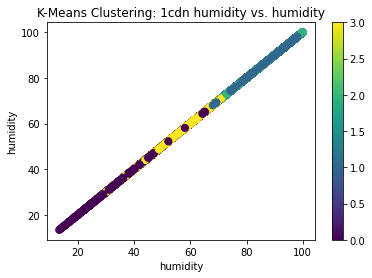

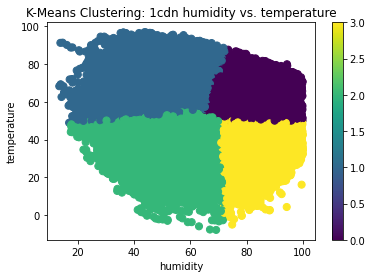

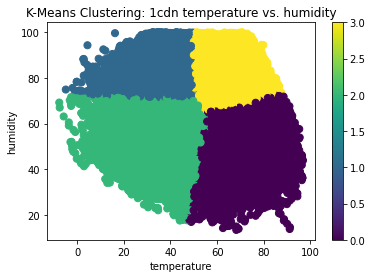

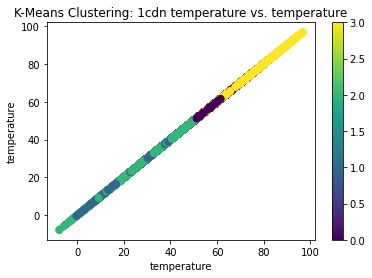

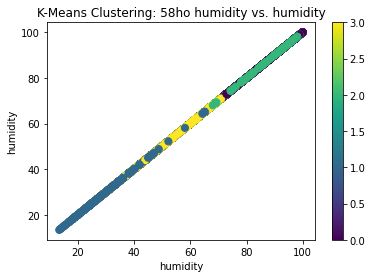

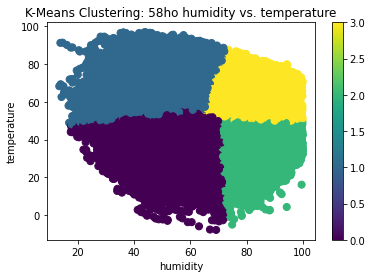

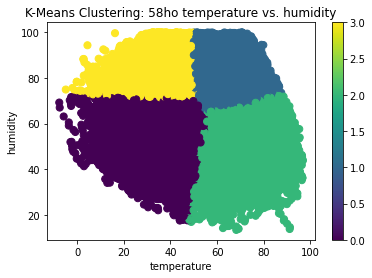

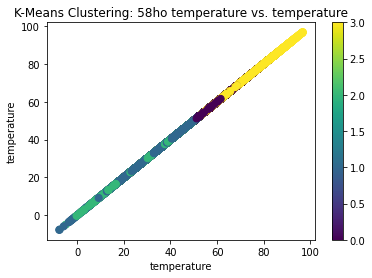

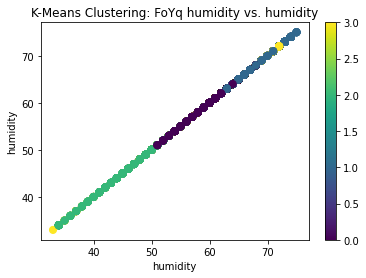

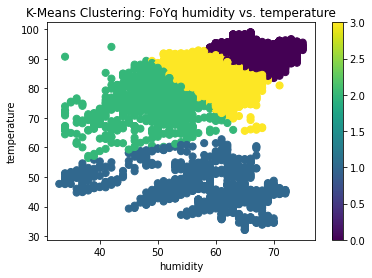

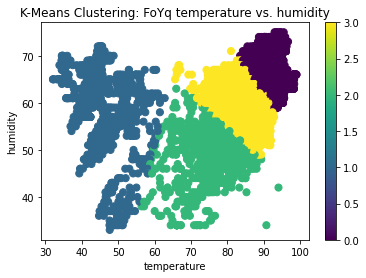

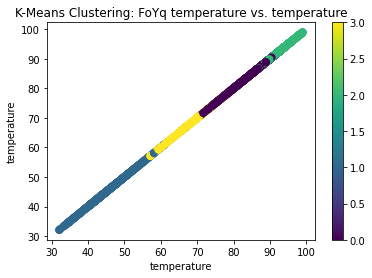

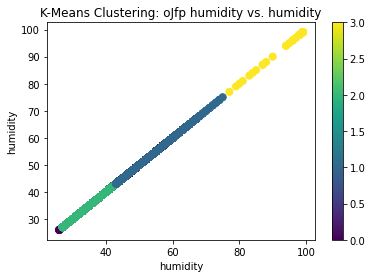

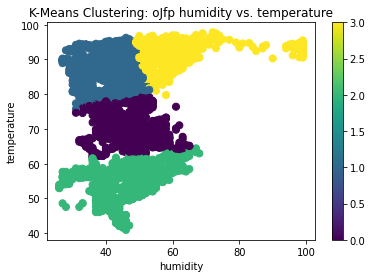

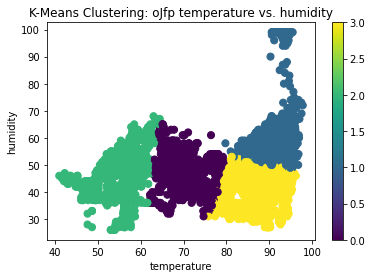

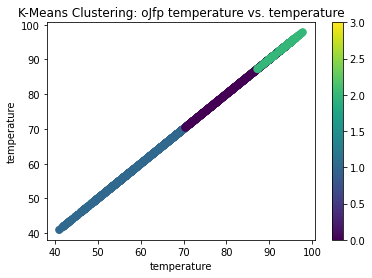

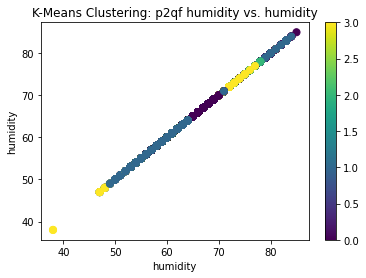

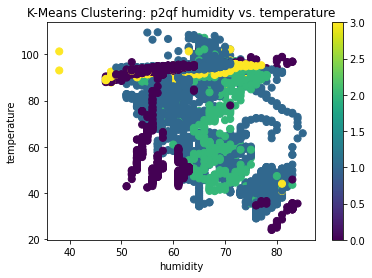

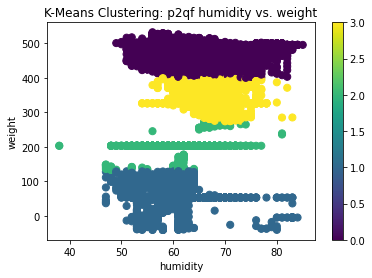

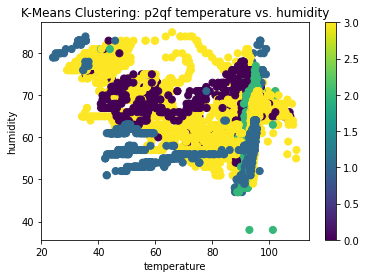

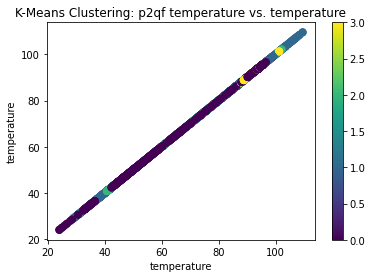

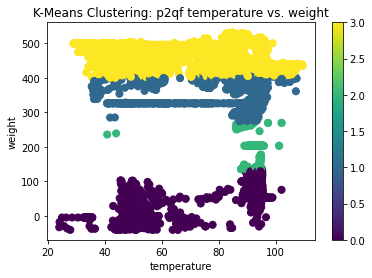

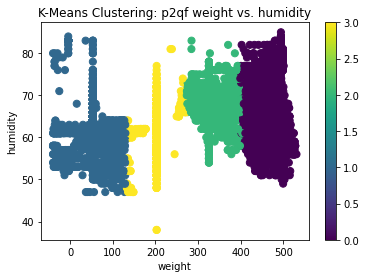

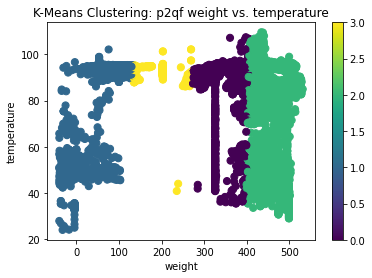

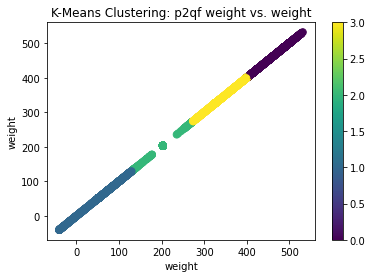

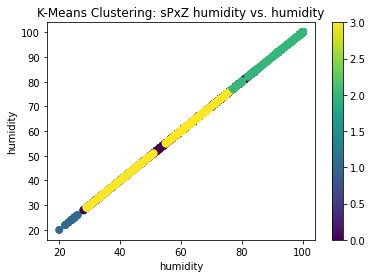

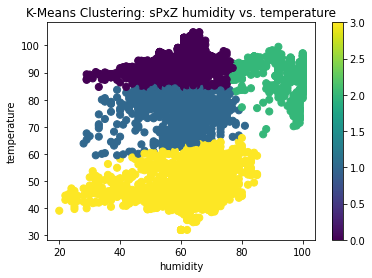

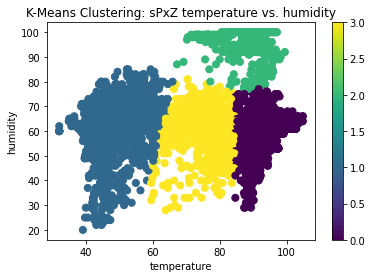

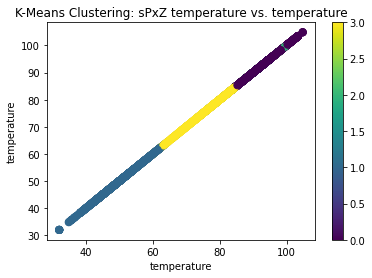

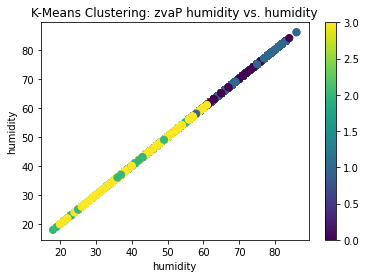

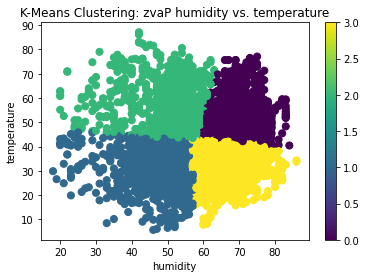

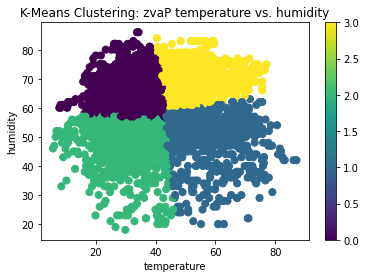

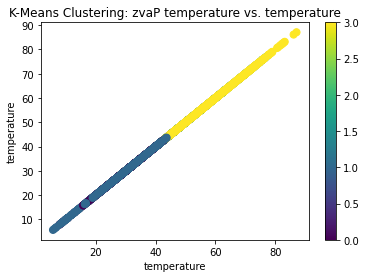

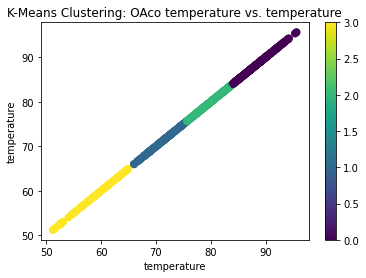

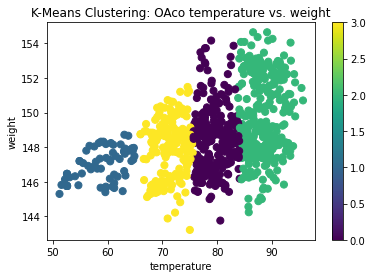

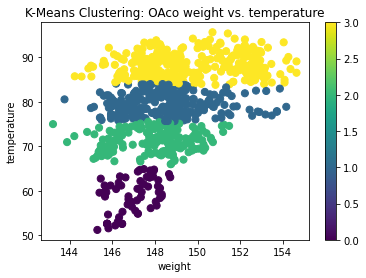

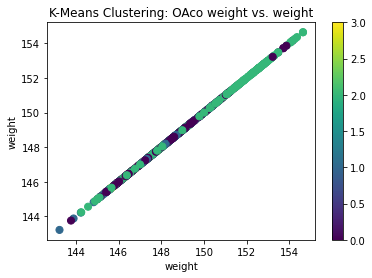

In [16]:
for hive in ss_hive_dfs:
    for col in ss_hive_dfs[hive]:
        for col2 in ss_hive_dfs[hive]:
            clust_labels, cent = doKmeans(ss_hive_dfs[hive], 4)
            kmeans = pd.DataFrame(clust_labels)
            #Plot the clusters obtained using k means
            fig = plt.figure()
            ax = fig.add_subplot(111)
            scatter = ax.scatter(ss_hive_dfs[hive][col],ss_hive_dfs[hive][col2],
                                 c=kmeans[0],s=50)
            ax.set_title('K-Means Clustering: ' + hive + " " + col + " vs. " + col2)
            ax.set_xlabel(col)
            ax.set_ylabel(col2)
            plt.colorbar(scatter)